<h3>Cannabis Sales Revenue Pre & Post Covid - US & Canada</h3>

<h4>Introduction</h4>

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
from datetime import *
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import pylab as pl
import scipy.stats as st
from scipy.stats import linregress

#Change directory where the notebook is pointing from C:/Users/bxprd
os.chdir("C:/Users/bxprd/Data Analytics Bootcamp/Git_Repos/data-analysis-project-1/manny")
# cwd = os.getcwd()
# cwd

#Assign variables for the csv files
canada_metadata_size = "./Data/Canada_market_size.csv"
canada_metadata_category = "./Data/Canada_market_byCategory_size.csv"
us_metadata_size = "./Data/US_market_size.csv"
us_metadata_category = "./Data/US_market_byCategory_size.csv"

#Read the CSV files into new variables
canada_market_size = pd.read_csv(canada_metadata_size)
canada_market_category = pd.read_csv(canada_metadata_category)
us_market_size = pd.read_csv(us_metadata_size)
us_market_category = pd.read_csv(us_metadata_category)

#Create a list of CSV's
csvs = [canada_market_size, us_market_size, canada_market_category, us_market_category]

#Iterate through the CSV's list to convert date object to datetime datatype and add new column with m-Y where 
#month is in words
for csv in csvs:
    csv["Date"] = pd.to_datetime(csv["Date"], format = "%m/%d/%Y")
    csv["Year"] = pd.to_datetime(csv["Date"]).dt.year
    csv["Date (Words)"] = pd.to_datetime(csv["Date"]).dt.strftime("%B-%y")

#Rearrange the Dataframes by using the melt method so that instead of the region being a column heading it's now a column
canada_market_category_rearr = canada_market_category.melt(id_vars = ["Date","Market Category","Date (Words)","Year"], 
value_vars=["Alberta, Canada", "British Columbia, Canada", "Ontario, Canada", "Saskatchewan, Canada"], var_name = "Region", 
value_name = "Sales (Millions)")

us_market_category_rearr = us_market_category.melt(id_vars = ["Date","Market Category","Date (Words)","Year"], 
value_vars = ["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"], var_name = "Region", value_name = "Sales (Millions)")

canada_market_size_rearr = canada_market_size.melt(id_vars = ["Date","Date (Words)","Year"], 
value_vars = ["Alberta, Canada", "British Columbia, Canada", "Ontario, Canada", "Saskatchewan, Canada"], var_name = "Region", 
value_name = "Sales (Millions)")

us_market_size_rearr = us_market_size.melt(id_vars = ["Date","Date (Words)","Year"], 
value_vars = ["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"], var_name = "Region", value_name = "Sales (Millions)")

#Create new list of the re-arranged Dataframes
new_csvs = [canada_market_size_rearr, us_market_size_rearr, canada_market_category_rearr, us_market_category_rearr]

#Iterate through the new dataframes to add a new column showing the formatting of the Sales
for csv in new_csvs:
    csv["Sales (Millions) $F"] = (csv["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

#Sort the dataframes     
canada_market_category.sort_values(by=["Date","Market Category"], inplace=True) 
us_market_category.sort_values(by=["Date","Market Category"], inplace=True)
canada_market_size.sort_values(by=["Date"], inplace=True)
us_market_size.sort_values(by=["Date"], inplace=True)

<h3>Running All the DataFrames</h3><br>

<body>Below are the dataframes before and after to demonstrate that the formatting and modifications to the data took place in Jupyter notebooks not in Excel.</body><br><br><body>The currency for the Canada DataFrames is Canadian Dollar.</body>

In [57]:
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

display(canada_market_category.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(canada_market_category.dtypes)

display(canada_market_category_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(canada_market_category_rearr.dtypes)

,Date,"Alberta, Canada","British Columbia, Canada","Ontario, Canada","Saskatchewan, Canada",Market Category,Year,Date (Words)
206,2019-12-01 00:00:00,0,0,0,0,Topical,2019,December-19
160,2020-09-01 00:00:00,153863,187886,246139,43164,Topical,2020,September-20
113,2019-07-01 00:00:00,1330970,0,0,507787,Oil,2019,July-19


Date                        datetime64[ns]
Alberta, Canada                      int64
British Columbia, Canada             int64
Ontario, Canada                      int64
Saskatchewan, Canada                 int64
Market Category                     object
Year                                 int64
Date (Words)                        object
dtype: object

,Date,Market Category,Date (Words),Year,Region,Sales (Millions),Sales (Millions) $F
211,2020-12-01 00:00:00,Edibles,December-20,2020,"Alberta, Canada",2424900,"$2,424,900"
689,2020-02-01 00:00:00,Vapor Pens,February-20,2020,"Saskatchewan, Canada",1284355,"$1,284,355"
12,2020-01-01 00:00:00,Edibles,January-20,2020,"Alberta, Canada",1099423,"$1,099,423"


Date                   datetime64[ns]
Market Category                object
Date (Words)                   object
Year                            int64
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [58]:
display(canada_market_size.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(canada_market_size.dtypes)

display(canada_market_size_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(canada_market_size_rearr.dtypes)

,Date,"Alberta, Canada","British Columbia, Canada","Ontario, Canada","Saskatchewan, Canada",Year,Date (Words)
1,2019-02-01 00:00:00,0,0,0,0,2019,February-19
4,2019-05-01 00:00:00,17450339,0,0,7015160,2019,May-19
18,2020-07-01 00:00:00,51768781,34651742,46253187,12734061,2020,July-20


Date                        datetime64[ns]
Alberta, Canada                      int64
British Columbia, Canada             int64
Ontario, Canada                      int64
Saskatchewan, Canada                 int64
Year                                 int64
Date (Words)                        object
dtype: object

,Date,Date (Words),Year,Region,Sales (Millions),Sales (Millions) $F
93,2020-10-01 00:00:00,October-20,2020,"Saskatchewan, Canada",13765608,"$13,765,608"
9,2019-10-01 00:00:00,October-19,2019,"Alberta, Canada",28305396,"$28,305,396"
10,2019-11-01 00:00:00,November-19,2019,"Alberta, Canada",29832554,"$29,832,554"


Date                   datetime64[ns]
Date (Words)                   object
Year                            int64
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [59]:
display(us_market_category.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}])) 
display(us_market_category.dtypes)

display(us_market_category_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(us_market_category_rearr.dtypes)

,Date,"California, US","Colorado, US","Massachusetts, US","Michigan, US","Nevada, US","Oregon, US","Washington, US",Market Category,Year,Date (Words)
164,2020-09-01 00:00:00,26067460,20794695,4486777,7775522,2959087,12389622,16109403,Concentrates,2020,September-20
75,2019-04-01 00:00:00,18379856,5110587,3650897,0,6711760,4252529,9946249,Pre-Rolls,2019,April-19
129,2019-10-01 00:00:00,32372969,16141359,5386066,0,6577779,6118331,8023953,Edibles,2019,October-19


Date                 datetime64[ns]
California, US                int64
Colorado, US                  int64
Massachusetts, US             int64
Michigan, US                  int64
Nevada, US                    int64
Oregon, US                    int64
Washington, US                int64
Market Category              object
Year                          int64
Date (Words)                 object
dtype: object

,Date,Market Category,Date (Words),Year,Region,Sales (Millions),Sales (Millions) $F
267,2019-04-01 00:00:00,Tinctures-Sublinguals,April-19,2019,"Colorado, US",1186353,"$1,186,353"
721,2019-02-01 00:00:00,Pre-Rolls,February-19,2019,"Michigan, US",0,$0
272,2019-09-01 00:00:00,Tinctures-Sublinguals,September-19,2019,"Colorado, US",1390726,"$1,390,726"


Date                   datetime64[ns]
Market Category                object
Date (Words)                   object
Year                            int64
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [60]:
display(us_market_size.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(us_market_size.dtypes)

display(us_market_size_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(us_market_size_rearr.dtypes)

,Date,"California, US","Colorado, US","Massachusetts, US","Michigan, US","Nevada, US","Oregon, US","Washington, US",Year,Date (Words)
15,2020-04-01 00:00:00,331295284,112005722,0,61661597,45755124,89317385,118500059,2020,April-20
23,2020-12-01 00:00:00,393999999,158592920,80250000,94150000,62750004,93873795,119950004,2020,December-20
4,2019-05-01 00:00:00,229915345,113649257,36949195,0,52865534,63368985,91507222,2019,May-19


Date                 datetime64[ns]
California, US                int64
Colorado, US                  int64
Massachusetts, US             int64
Michigan, US                  int64
Nevada, US                    int64
Oregon, US                    int64
Washington, US                int64
Year                          int64
Date (Words)                 object
dtype: object

,Date,Date (Words),Year,Region,Sales (Millions),Sales (Millions) $F
28,2019-05-01 00:00:00,May-19,2019,"Colorado, US",113649257,"$113,649,257"
96,2019-01-01 00:00:00,January-19,2019,"Nevada, US",48516751,"$48,516,751"
116,2020-09-01 00:00:00,September-20,2020,"Nevada, US",68368340,"$68,368,340"


Date                   datetime64[ns]
Date (Words)                   object
Year                            int64
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

<h3>Canada DataFrames Further Modification</h3><br>

<body>The Canada DataFrames had to be modified one additional time because the currency was in Canadian dollar.  I ran a simple calculation on the original Sales (Millions) column to convert to USD, but I thought it would be important to display the original Canadian dollar amount so I added a column named Sales (Millions) CAD.  In order to do this I:</body> <ul>
    <li>assigned the value of the original Sales (Millions) column to the new Sales (Millions) CAD column and added to the DataFrame</li>
    <li>assigned the Sales (Millions) CAD column to a temp variable</li>
    <li>dropped the Sales (Millions) CAD column from the DataFrame temporarily</li>
    <li>ran the calculation to convert CAD to USD on the Sales (Millions) column only</li>
    <li>assigned the temp variable value to the Sales (Millions) CAD column and brought it back to the DataFrame</li>
</ul><br>

<body> Finally, I formatted the converted Sales (Millions) column so that it's displayed in \$,. format and put the formatted data in its own column named Sales (Millions) \$F.</body>

In [61]:
#Exchange rate derived by taking the rate from end of 2019 & 2020 and averaging them
cadtousd_avg_exch_rate = 1.334

#Assign the original value of the Sales (Millions) column to a new column for Canadian Dollar called Sales (Millions) CAD
canada_market_category_rearr["Sales (Millions) CAD"] = canada_market_category_rearr["Sales (Millions)"]

#This will remove the $, formatting on the Sales (Millions) $F column and convert to an int so calculations can be done
canada_market_category_rearr[canada_market_category_rearr.columns[6:]] = canada_market_category_rearr[canada_market_category_rearr.columns[6:]].replace('[\$,]', '', regex=True).astype(np.int64)

#Convert Canadian dollar to USD by multiplying only Sales (Millions) & Sales (Millions) $F columns only
canada_market_category_convert =round(canada_market_category_rearr[["Sales (Millions)", "Sales (Millions) $F"]]*cadtousd_avg_exch_rate,0).astype(np.int64)
canada_market_category_rearr[canada_market_category_convert.columns] = canada_market_category_convert

#Re-apply the formatting to the Sales (Millions) $F column
canada_market_category_rearr["Sales (Millions) $F"] = (canada_market_category_rearr["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

#Display dataframe
canada_market_category_rearr[["Date", "Date (Words)", "Year", "Region", "Market Category","Sales (Millions) CAD",
                               "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Market Category,Sales (Millions) CAD,Sales (Millions),Sales (Millions) $F
378,2020-09-01,September-20,2020,"British Columbia, Canada",Topical,187886,250640,"$250,640"
39,2019-03-01,March-19,2019,"Alberta, Canada",Edibles,0,0,$0
43,2019-03-01,March-19,2019,"Alberta, Canada",Topical,0,0,$0
0,2019-01-01,January-19,2019,"Alberta, Canada",Beverages,0,0,$0
317,2020-06-01,June-20,2020,"British Columbia, Canada",Beverages,319070,425639,"$425,639"


In [62]:
#Assign the original value of the Sales (Millions) column to a new column for Canadian Dollar called Sales (Millions) CAD
canada_market_size_rearr["Sales (Millions) CAD"] = canada_market_size_rearr["Sales (Millions)"]

#This will remove the $, formatting on the Sales (Millions) $F column and convert to an int so calculations can be done
canada_market_size_rearr[canada_market_size_rearr.columns[5:]] = canada_market_size_rearr[canada_market_size_rearr.columns[5:]].replace('[\$,]', '', regex=True).astype(int)

#Convert Canadian dollar to USD by multiplying only columns that are numbers by the exchange rate and putting those columns
#back in original dataframe
canada_market_size_convert = round(canada_market_size_rearr[["Sales (Millions)", "Sales (Millions) $F"]]*cadtousd_avg_exch_rate,0).astype(int)
canada_market_size_rearr[canada_market_size_convert.columns] = canada_market_size_convert

#Re-apply the formatting to the Sales (Millions) $F column
canada_market_size_rearr["Sales (Millions) $F"] = (canada_market_size_rearr["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

# #Display dataframe
canada_market_size_rearr[["Date", "Date (Words)", "Year","Region", "Sales (Millions) CAD",
                             "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Sales (Millions) CAD,Sales (Millions),Sales (Millions) $F
81,2019-10-01,October-19,2019,"Saskatchewan, Canada",7326069,9772976,"$9,772,976"
31,2019-08-01,August-19,2019,"British Columbia, Canada",12034545,16054083,"$16,054,083"
70,2020-11-01,November-20,2020,"Ontario, Canada",68883529,91890628,"$91,890,628"
22,2020-11-01,November-20,2020,"Alberta, Canada",53307333,71111982,"$71,111,982"
77,2019-06-01,June-19,2019,"Saskatchewan, Canada",6171316,8232536,"$8,232,536"


In [63]:
us_market_category_rearr[["Date", "Date (Words)", "Year", "Region", "Market Category", 
                             "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Market Category,Sales (Millions),Sales (Millions) $F
1484,2020-09-01,September-20,2020,"Washington, US",Capsules,529034,"$529,034"
1248,2019-01-01,January-19,2019,"Oregon, US",Capsules,0,$0
1412,2020-09-01,September-20,2020,"Washington, US",Flower,58043993,"$58,043,993"
861,2020-10-01,October-20,2020,"Michigan, US",Beverages,190141,"$190,141"
507,2019-04-01,April-19,2019,"Massachusetts, US",Pre-Rolls,3650897,"$3,650,897"


In [64]:
us_market_size_rearr[["Date", "Date (Words)", "Year","Region", "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Sales (Millions),Sales (Millions) $F
59,2019-12-01,December-19,2019,"Massachusetts, US",49758104,"$49,758,104"
137,2020-06-01,June-20,2020,"Oregon, US",100125681,"$100,125,681"
44,2020-09-01,September-20,2020,"Colorado, US",166543994,"$166,543,994"
37,2020-02-01,February-20,2020,"Colorado, US",112064319,"$112,064,319"
38,2020-03-01,March-20,2020,"Colorado, US",128115183,"$128,115,183"


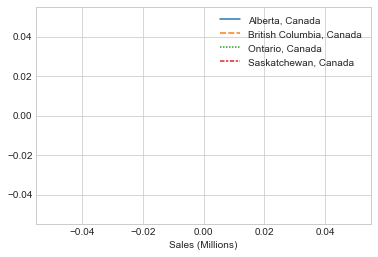

In [76]:
# plt.plot(x=canada_market_size[["Date"]], linewidth = 1)
# plt.xlabel("Date")
# plt.ylabel("Sales (USD Millions)")
# plt.show()

# cannabis_line = canada_market_size_rearr.plot.line(x = "Date (Words)",figsize = (25,10))
# cannabis_line.set_ylabel("Cannabis Sales for 2019 & 2020")
# cannabis_line.grid('off', which='major')


import seaborn as sns

#sns.set_theme(style="whitegrid")

values = canada_market_category_rearr["Sales (Millions)"]
dates = canada_market_category_rearr["Date (Words)"]
data = pd.DataFrame(values, dates, columns=["Alberta, Canada", "British Columbia, Canada", "Ontario, Canada", "Saskatchewan, Canada"])
#data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

# fig = plt.figure()
# ax = plt.axes()

In [72]:
# Multi line plot
ax = product.plot("Year", "ProdASales", kind="line", label = 'Product A Sales')
product.plot("Year", "ProdBSales", ax= ax , kind="line", label = 'Product B Sales', title= 'MultiLine Plot') #ax : axes object

# Set axes
ax.set(ylabel='Sales', xlabel = 'Year', xticks =df["Year"])

NameError: name 'product' is not defined

In [ ]:
ax = product.plot("Year", "ProdASales", kind='scatter', color = 'red', title = 'Year by ProductA Sales')
ax.set(ylabel='ProductA Sales', xlabel = 'Year', xticks =df["Year"])
plt.show()